# TP 9 : Transformations affines du plan

Dans ce TP, on souhaite programmer quelques classes élémentaires permettant de programmer des calculs sur des points et des vecteurs du plan, ainsi que les principales transformations affines du plan (rotations et translations).

Pour illustrer les applications possibles, on propose pour terminer le TP une ébauche de jeu vidéo 2D dans le style du cours de Programmation Web de L1 (voir la partie 4). Dans ce programme est implémenté le déplacement (activé par les touches de direction) d'un "vaisseau spatial" représenté par un polygone.

Comme dans la feuille d'exercices de TD, on assimilera le point $M=O + x \vec{i} + y \vec {j}$ au *vecteur* $\begin{bmatrix}x\\y\end{bmatrix}$. 

## 1. Vecteurs

- Compléter le code de la classe `Vecteur2D` suivante de manière à ce que tous les doctests fonctionnent.

In [1]:
from math import sqrt

class Vecteur2D:
    """Classe permettant de représenter des vecteurs du plan.
    
    >>> Vecteur2D()
    Vecteur2D(0, 0)
    
    >>> Vecteur2D(2, 0) + Vecteur2D(1, 2)
    Vecteur2D(3, 2)
    
    >>> Vecteur2D(1, 2) * 2
    Vecteur2D(2, 4)

    >>> -Vecteur2D(1, 2)
    Vecteur2D(-1, -2)
    
    >>> abs(Vecteur2D(3, 4))
    5.0
    """
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
    
    def __repr__(self):
        return "Vecteur2D({}, {})".format(self.x, self.y)
    
    def __add__(self, other):
        """Addition vectorielle."""
        if isinstance(other, Vecteur2D):
            return Vecteur2D(self.x + other.x, self.y + other.y)
        else:
            raise TypeError("unsupported operand types for +: " 
                            "Vecteur2D and {}".format(type(other)))
            
    def __mul__(self, other):
        """Multiplication par un réel ou un entier."""
        if isinstance(other, int) or isinstance(other, float):
            return Vecteur2D(self.x * other, self.y * other)
        else:
            raise TypeError("unsupported operand types for *: "
                            "Vecteur2D and {}".format(type(other)))
    
    def __neg__(self):
        """Opposé."""
        return Vecteur2D(-self.x, -self.y)
    
    def __sub__(self, other):
        """Soustraction vectorielle."""
        return self + (-other)
    
    def __abs__(self):
        """Norme du vecteur (utile en partie 4)."""
        return sqrt(self.x ** 2 + self.y ** 2)

On peut vérifier les tests de la classe à l'aide du module `doctest` :

In [2]:
import doctest

In [3]:
doctest.run_docstring_examples(Vecteur2D, globals())

## 2. Matrices

- Compléter la classe `Matrice2D` suivante de manière à ce que tous les doctests fonctionnent.

In [4]:
from copy import deepcopy

class Matrice2D:
    """Classe permettant de représenter des matrices 2x2.
    
    >>> m = Matrice2D()
    >>> m
    Matrice2D([[1, 0], [0, 1]])
    
    >>> m + m
    Matrice2D([[2, 0], [0, 2]])
    
    >>> m * m
    Matrice2D([[1, 0], [0, 1]])
    
    >>> m = Matrice2D([[1, -1], [1, 1]])
    >>> m * m
    Matrice2D([[0, -2], [2, 0]])
    
    >>> m * Vecteur2D(1, 1)
    Vecteur2D(0, 2)
    """
    def __init__(self, coefs=None):
        # Par défaut, on construit la matrice identité
        self.coefs = coefs or [[1, 0], [0, 1]]
    
    def __repr__(self):
        return "Matrice2D({})".format(repr(self.coefs))
    
    def __add__(self, other):
        """Addition de matrices."""
        if isinstance(other, Matrice2D):
            result_coefs = [[0] * 2 for _ in range(2)]
            for i, line in enumerate(self.coefs):
                for j in range(len(line)):
                    result_coefs[i][j] = self.coefs[i][j] + other.coefs[i][j]
            return Matrice2D(result_coefs)
        else:
            raise TypeError("unsupported operand types for +: "
                            "Matrice2D and {}".format(type(other)))
    
    def __mul__(self, other):
        """Multiplication par un vecteur ou une matrice."""
        if isinstance(other, Vecteur2D):
            return self._produit_par_vecteur(other) 
        elif isinstance(other, Matrice2D):
            return self._produit_par_matrice(other)
        else:
            raise TypeError("unsupported operand types for *: " 
                            "Matrice2D and {}".format(type(other)))
            
    def _produit_par_vecteur(self, vect):
        """Produit matrice x vecteur."""
        return Vecteur2D(vect.x * self.coefs[0][0] + vect.y * self.coefs[0][1], 
                         vect.x * self.coefs[1][0] + vect.y * self.coefs[1][1])
    
    def _produit_par_matrice(self, mat):
        """Produit matrice x matrice."""
        result_coefs = [[0] * 2 for _ in range(2)]
        for i, line in enumerate(self.coefs):
            for j in range(len(line)):
                for k in range(len(line)):
                    result_coefs[i][j] += self.coefs[i][k] * mat.coefs[k][j]
        return Matrice2D(result_coefs)

In [5]:
doctest.run_docstring_examples(Matrice2D, globals())

## 3. Transformations affines

On va écrire trois classes permettant de représenter respectivement des transformations affines quelconques, des rotations et des translations. 

On utilise ici le principe *d'héritage* (notion nouvelle) pour rassembler le code commun à plusieurs transformations (par exemple la méthode `compose`, qui est *héritée* de la classe `TransformationAffine2D`dans les classes `Rotation2D` et `Translation2D`). Nous ne donnons volontairement que très peu d'explications, ce sujet sera traité en détail en L3.

- Compléter les classes suivantes de manière à ce que tous les doctests fonctionnent.

### Classe générale

In [6]:
class TransformationAffine2D:
    """Transformation affine (quelconque) du plan.
    
    >>> m = Matrice2D([[1, -1], [1, 1]])
    >>> v = Vecteur2D(1, -1)
    >>> t = TransformationAffine2D(m, v)
    >>> t.applique(Vecteur2D(0, 1))
    Vecteur2D(0, 0)
    
    >>> t.applique(Vecteur2D(1, 0))
    Vecteur2D(2, 0)
    
    >>> t.compose(t).applique(Vecteur2D(1, 0))
    Vecteur2D(3, 1)
    """
    
    def __init__(self, mat=None, vec=None):
        # Par défaut, on construit la transformation identité
        self.mat = mat or Matrice2D()
        self.vec = vec or Vecteur2D()
        
    def __repr__(self):
        return "TransformationAffine2D({}, {})".format(
            repr(self.mat), repr(self.vec))
    
    def compose(self, other):
        """Construit la transformation (self o other).
        
        Attention à l'ordre ! La transformation composée
        revient à appliquer d'abord other, puis self.
        """
        mat = self.mat * other.mat
        vec = self.mat * other.vec + self.vec
        return TransformationAffine2D(mat, vec)
    
    def applique(self, vecteur):
        """Applique la transformation self à vecteur et 
        renvoie un vecteur."""
        return self.mat * vecteur + self.vec

In [7]:
doctest.run_docstring_examples(TransformationAffine2D, globals())

### Rotations

In [8]:
from math import cos, sin, pi

class Rotation2D(TransformationAffine2D):
    """Rotation déterminée par un centre (vecteur 2D) et un angle.
    
    Cette classe hérite de TransformationAffine2D et ses instances ont 
    les mêmes attributs mat et vec.
    
    >>> r = Rotation2D(Vecteur2D(1, 1), pi/2)
    >>> r.applique(Vecteur2D())
    Vecteur2D(2.0, 0.0)
    
    >>> r.compose(r).applique(Vecteur2D())
    Vecteur2D(2.0, 2.0)
    """
    def __init__(self, centre, angle):
        self.centre = centre
        self.angle = angle
        
        self.mat = Matrice2D([[cos(angle), -sin(angle)], [sin(angle), cos(angle)]])
        self.vec = centre - self.mat * centre
        
    def __repr__(self):
        return "Rotation2D({}, {})".format(repr(self.centre), repr(self.angle))

In [9]:
doctest.run_docstring_examples(Rotation2D, globals())

### Translations

In [10]:
class Translation2D(TransformationAffine2D):
    """Translation définie par un vecteur.
    
    >>> t = Translation2D(Vecteur2D(1, 0))
    >>> t.applique(Vecteur2D(0, 0))
    Vecteur2D(1, 0)
    
    >>> r = Rotation2D(Vecteur2D(), pi)
    >>> v = r.compose(t).applique(Vecteur2D(-2, 0))
    >>> v.x, round(v.y, 6)
    (1.0, -0.0)
    """
    def __init__(self, vec):
        self.mat = Matrice2D()
        self.vec = vec
        
    def __repr__(self):
        return "Translation2D({})".format(repr(self.vec))

In [11]:
doctest.run_docstring_examples(Translation2D, globals())

### Essais

Pour mieux visualiser l'effet de certaines transformations affines, on se propose de dessiner grâce à `matplotlib` l'effet d'une transformation sur un polygone. On définit une classe `Polygone` appropriée :

In [12]:
from matplotlib.patches import Polygon

class Polygone:
    """Polygone composé d'une liste de Vecteur2D vus comme des points."""
    def __init__(self, points):
        self.points = [] if points is None else points
        
    def transforme(self, trans):
        """Applique la transformation trans à chaque point."""
        points = map(trans.applique, self.points)
        return Polygone(list(points))
    
    def trace(self, left=0, right=1, top=1, bottom=0):
        """Trace self sur un graphique matplotlib.
        
        Les paramètres left, right, bottom et top permettent de spécifier
        la portion du plan dessinée."""
        pts  = []
        for v in self.points:
            pts.append((v.x, v.y))
        fig, ax = plt.subplots()
        ax.set_xlim(left=left, right=right)
        ax.set_ylim(bottom=bottom, top=top)
        ax.grid()
        ax.add_patch(Polygon(pts, closed=True))
        plt.show()

 Voici un exemple de visualisation (ici avec la transformation identité) :

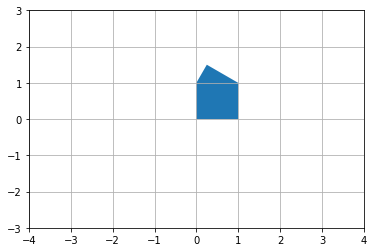

In [13]:
from matplotlib import pyplot as plt

p = Polygone([Vecteur2D(0, 0), Vecteur2D(1, 0), 
              Vecteur2D(1, 1), Vecteur2D(1/4, 1.5),
              Vecteur2D(0, 1)])

tr = TransformationAffine2D()
p.transforme(tr).trace(left=-4, right = 4, bottom=-3, top=3)

- Tester en les dessinant les effets de différentes transformations affines sur le polygone `p`.

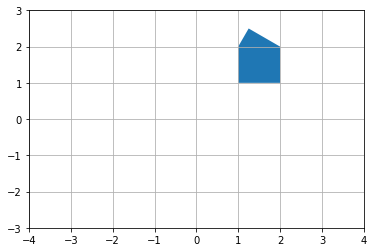

In [14]:
tr = Translation2D(Vecteur2D(1, 1))
q = p.transforme(tr)
q.trace(left=-4, right = 4, bottom=-3, top=3)

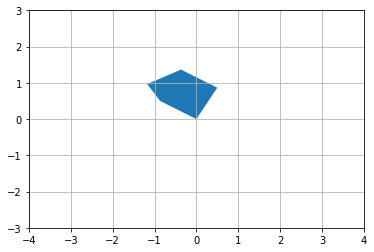

In [15]:
tr = Rotation2D(Vecteur2D(0, 0), pi/3)
q = p.transforme(tr)
q.trace(left=-4, right = 4, bottom=-3, top=3)

## 4. Exemple d'application

Pour terminer, voici une ébauche de code d'un petit jeu vidéo de vaisseau spatial. On utilise volontairement le module `tkinter` (et non `upemtk`) directement, pour nous rapprocher d'un fonctionnement proche de JavaScript (création d'un objet `Canvas` et mise en place de "*listeners*" pour les événements).

Le code est intégralement fourni, le travail demandé est de le lire, l'exécuter, le comprendre et, s'il reste du temps, l'améliorer.

### Polygones

On redéfinit la classe Polygone afin de pouvoir dessiner sur un canevas `tkinter`.

In [16]:
class Polygone:
    def __init__(self, points):
        self.points = [] if points is None else points
        
    def transforme(self, trans):
        points = map(trans.applique, self.points)
        return Polygone(list(points))
    
    def dessine(self, canevas, etiquette):
        coords = []
        for p in self.points:
            coords.append(p.x)
            coords.append(p.y)
        canevas.create_polygon(
            coords, fill="gray", outline="black", width=2, 
            tag=etiquette)

### Vaisseaux

La dynamique du vaisseau obéit à la seconde loi de Newton (sous forme simplifiée) : l'accélération est proportionnelle à la somme des forces qui s'appliquent sur le vaisseau. Couplé à une boucle principale régulière, cela suffit à donner une impression de mouvement réaliste.

In [17]:
class Vaisseau:
    coef_acceleration = 0.05
    coef_rotation = 0.0003
    
    forme_defaut = Polygone(
        [Vecteur2D(-15, 10), Vecteur2D(20, 0), Vecteur2D(-15, -10)])
    
    def __init__(self, jeu, etiquette,
                 position=None, vitesse=None, 
                 direction=0, rotation=0,
                 forme=None):
        self.jeu = jeu
        self.etiquette = etiquette
        self.position = Vecteur2D() if position is None else position
        self.vitesse = Vecteur2D() if vitesse is None else vitesse
        self.direction = direction
        self.rotation = rotation
        self.forme = Vaisseau.forme_defaut if forme is None else forme
    
    def deplace(self):
        self.position += self.vitesse
        self.direction += self.rotation
        
    def accelere(self):
        vect = Vecteur2D(cos(self.direction), sin(self.direction))
        self.vitesse += vect * Vaisseau.coef_acceleration            
    
    def babord(self):
        self.rotation -= Vaisseau.coef_rotation
        
    def tribord(self):
        self.rotation += Vaisseau.coef_rotation
        
    def gravite(self, other):
        v = other.position - self.position
        d = max(abs(v), other.rayon)  # pour éviter des effets bizarres
        self.vitesse += v * other.masse * (1 / d ** 3)
    
    def dessine(self):
        self.jeu.canevas.delete(self.etiquette)
        rot = Rotation2D(Vecteur2D(), self.direction)
        trans = Translation2D(self.position)
        poly = self.forme.transforme(trans.compose(rot))
        poly.dessine(self.jeu.canevas, self.etiquette)

### Planètes

In [18]:
class Planete:
    
    def __init__(self, jeu, etiquette, position, masse, rayon):
        self.jeu = jeu
        self.etiquette = etiquette
        self.position = position
        self.masse = masse
        self.rayon = rayon
        
    def dessine(self):
        self.jeu.canevas.delete(self.etiquette)
        x, y = self.position.x, self.position.y
        r = self.rayon
        self.jeu.canevas.create_oval(x - r, y - r, x + r, y + r,
                                     fill="gray", outline="black", width=2,
                                     tag=self.etiquette)

### Interface et boucle principale du jeu

In [19]:
import tkinter as tk

class Jeu:
    
    def __init__(self, largeur, hauteur):
        self.largeur = largeur
        self.hauteur = hauteur
        
        self.racine = tk.Tk()
        self.canevas = tk.Canvas(self.racine, width=largeur, height=hauteur)
        self.canevas.grid(column=0, row=0, sticky=(tk.N, tk.W, tk.E, tk.S))
        
        self.vaisseau = Vaisseau(self, "voyager", 
                                 Vecteur2D(largeur/2, hauteur/3),
                                 Vecteur2D(1, 0))
        self.planete = Planete(self, "terre", 
                               Vecteur2D(largeur/2, hauteur/2), 200, 20)
        
        self.pressees = set()
        self.keymap = {
            "Up": self.vaisseau.accelere,
            "Left": self.vaisseau.babord,
            "Right": self.vaisseau.tribord
        }
        self.configure_touches()
        
    def configure_touches(self):
        self.racine.bind("<KeyPress>", lambda e: self.pressees.add(e.keysym))
        self.racine.bind("<KeyRelease>", lambda e: self.pressees.discard(e.keysym))

    def traite_touches(self):
        for touche in self.keymap.keys() & self.pressees:
            self.keymap[touche]()
        
    def tour(self):
        self.traite_touches()
        self.vaisseau.deplace()
        self.vaisseau.dessine()
        self.vaisseau.gravite(self.planete)
        self.racine.after(20, self.tour)
        
    def lance(self):
        self.tour()
        self.planete.dessine()
        self.racine.mainloop()

In [20]:
Jeu(800, 800).lance()

## $\star$ Pour aller plus loin

#### Homothéties
- Créer une classe `Homothétie2D` permettant de représenter des homothéties du plan, de centre et de rapport donné.
- Observer la forme des matrices de ces transformations.
- Tracer l'effet de quelques homothéties sur le polygone `p` utilisé en partie 3.
- Comment peut-on obtenir une symétrie centrale de centre donné ? Comparer avec la matrice de rotation d'angle $\pi$ et de même centre.

#### Symétries axiales
- Créer une classe `SymetrieAxiale2D` permettant de représenter des symétries d'axe quelconque (l'axe de symétrie sera donné par les paramètres $a$, $b$ et $c$ de l'équation de la droite de symétrie $ax + by = c$.
- Tracer l'effet de quelques symétries axiales sur le polygone `p`.

#### Transformations composées et diverses
- Tracer l'effet sur le polygone `p` de composées de transformations vues ci-dessus (composée de deux rotations, d'une rotation et d'une symétrie, etc.). Que peut-on observer ? Quelles formes ont les matrices obtenues ?
- Tracer l'effet sur le polygone `p` de transformations affines quelconques, qui ne sont d'aucun des types ci-dessus. Quels types d'effets peut-on observer ?